In [155]:
import os

In [156]:
# !git clone https://github.com/resemble-ai/Resemblyzer.git
%cd Resemblyzer

[WinError 2] The system cannot find the file specified: 'Resemblyzer'
C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio


In [157]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AE71-C916

 Directory of C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio

05-04-2023  13:41    <DIR>          .
05-04-2023  13:18    <DIR>          ..
05-04-2023  13:41           134,108 1.wav
05-04-2023  13:41             5,336 10.wav
05-04-2023  13:41             5,336 11.wav
05-04-2023  13:41            37,088 12.wav
05-04-2023  13:41           370,484 13.wav
05-04-2023  13:41            79,424 14.wav
05-04-2023  13:41            52,964 2.wav
05-04-2023  13:41            52,964 3.wav
05-04-2023  13:41            10,628 4.wav
05-04-2023  13:41            10,628 5.wav
05-04-2023  13:41            47,672 6.wav
05-04-2023  13:41             5,336 7.wav
05-04-2023  13:41           349,316 8.wav
05-04-2023  13:41           232,892 9.wav
05-04-2023  13:29        37,762,742 audio_clear.wav
05-04-2023  13:26         3,249,924 harvard.wav
05-04-2023  03:12         1,850,496 mc22.wav
05-04-2023  11:31        15,946,714 tryst.wav
05-04-2023  0

In [158]:
%pip install -r requirements_package.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements_package.txt'


In [159]:
# %cd Resemblyzer
%cd -

C:\Users\GIRIRAJ ROY\Desktop\Dummy


In [160]:
%pip install -r requirements_demos.txt

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements_demos.txt'


In [161]:
%pip install -e .

Obtaining file:///C:/Users/GIRIRAJ%20ROY/Desktop/Dummy
Note: you may need to restart the kernel to use updated packages.


ERROR: file:///C:/Users/GIRIRAJ%20ROY/Desktop/Dummy does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [162]:
from resemblyzer import preprocess_wav, VoiceEncoder
from pathlib import Path

#give the file path to your audio file
audio_file='harvard.wav'
audio_file_path = f'C:/Users/GIRIRAJ ROY/Desktop/Dummy/Audio/{audio_file}'
# C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio\audio_file.wav
# C:/Users/GIRIRAJ ROY/Desktop/Dummy/Audio/audio_file.wav
wav_fpath = Path(audio_file_path)

wav = preprocess_wav(wav_fpath)
encoder = VoiceEncoder("cpu")
_, cont_embeds, wav_splits = encoder.embed_utterance(wav, return_partials=True, rate=16)
print(cont_embeds.shape)

Loaded the voice encoder model on cpu in 0.01 seconds.
(223, 256)


In [163]:
wav.shape

(237600,)

In [164]:
cont_embeds.shape


(223, 256)

In [165]:
wav_splits[2]

slice(1920, 27520, None)

#Note:
Sometimes the module might throw an error when you try to use an audio file having file extension different from wav, like mp3. In this case, you might need to convert your mp3 file to wav before using. You can use the below script (you will need to install pydub first)

In [166]:

# from pydub import AudioSegment

# def mp3_to_wav(audio_file_path):
#     sound = AudioSegment.from_mp3(audio_file_path)
#     audio_file_path = audio_file_path.split('.')[0] + '.wav'
#     sound.export(audio_file_path, format="wav")
#     return audio_file_path

# audio_file_path = mp3_to_wav(audio_file_path)


In [167]:
%pip install spectralcluster

In [168]:
from spectralcluster import SpectralClusterer

clusterer = SpectralClusterer(
    min_clusters=2,
    max_clusters=100,
    )

labels = clusterer.predict(cont_embeds)

c:\Users\GIRIRAJ ROY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [169]:
labels.shape

(223,)

In [170]:
import numpy as np
np.unique(labels)


array([0, 1], dtype=int64)

In [171]:
def create_labelling(labels,wav_splits):
    from resemblyzer import sampling_rate
    times = [((s.start + s.stop) / 2) / sampling_rate for s in wav_splits]
    labelling = []
    start_time = 0

    for i,time in enumerate(times):
        if i>0 and labels[i]!=labels[i-1]:
            temp = [str(labels[i-1]),start_time,time]
            labelling.append(tuple(temp))
            start_time = time
        if i==len(times)-1:
            temp = [str(labels[i]),start_time,time]
            labelling.append(tuple(temp))

    return labelling
  
labelling = create_labelling(labels,wav_splits)

In [172]:
labelling

[('0', 0, 2.36),
 ('1', 2.36, 5.12),
 ('0', 5.12, 8.18),
 ('1', 8.18, 10.28),
 ('0', 10.28, 12.56),
 ('1', 12.56, 14.12)]

In [173]:
type(labelling[0][2])

numpy.float64

In [174]:
len(labelling)

6

In [175]:
%cd C:/Users/GIRIRAJ ROY/Desktop/Dummy/Audio

C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio


In [176]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AE71-C916

 Directory of C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio

05-04-2023  13:41    <DIR>          .
05-04-2023  13:18    <DIR>          ..
05-04-2023  13:41           134,108 1.wav
05-04-2023  13:41             5,336 10.wav
05-04-2023  13:41             5,336 11.wav
05-04-2023  13:41            37,088 12.wav
05-04-2023  13:41           370,484 13.wav
05-04-2023  13:41            79,424 14.wav
05-04-2023  13:41            52,964 2.wav
05-04-2023  13:41            52,964 3.wav
05-04-2023  13:41            10,628 4.wav
05-04-2023  13:41            10,628 5.wav
05-04-2023  13:41            47,672 6.wav
05-04-2023  13:41             5,336 7.wav
05-04-2023  13:41           349,316 8.wav
05-04-2023  13:41           232,892 9.wav
05-04-2023  13:29        37,762,742 audio_clear.wav
05-04-2023  13:26         3,249,924 harvard.wav
05-04-2023  03:12         1,850,496 mc22.wav
05-04-2023  11:31        15,946,714 tryst.wav
05-04-2023  0

In [177]:
# !rm -rf Audio/*

In [178]:
# TODO THIS CELL CAN BE DISCARDED


# import os
# from pydub import AudioSegment

# c = 1
# folder_name = 'C:/Users/GIRIRAJ ROY/Desktop/Dummy'
# for i in labelling:

#   # Using system to write the file
#   # os.system(f"ffmpeg -i mc22.wav -ss {i[1]} -t {i[2]} -acodec copy Audio/{c}.wav")
#   # os.system(f"ffmpeg -i 'mc22.wav' -acodec copy -ss {i[1]} -to {i[2]} 'Audio/{c}.wav'")
#   # os.system(f"ffmpeg -i 'mc22.wav' -c:av copy -ss {i[1]} -t {i[2]} 'Audio/{c}.wav'")


#   # The followingare the syntaxe for ffmpeg
#   # ffmpeg -i BIG_FILE -acodec copy -ss START_TIME -to END_TIME LITTLE_FILE
#   # ffmpeg -i input.mkv -c:av copy -ss 00:01:00 -t 10 output.mkv



#   # Operating through File Handling
#   file_path = os.path.join(folder_name, f'Audio/{c}.wav')
  
#   with open(file_path, 'w') as f:
#       f.write(f"ffmpeg -i mc22.wav -acodec copy -ss {i[1]} -to {i[2]} Audio/{c}.wav")
      
#       # f.write(f"ffmpeg -i mc22.wav -ss {i[1]} -t {i[2]} -acodec copy Audio/{c}.wav")

#       # print(f.read())
#       f.close()

#   print(f'done {c}')
#   c = c + 1

In [179]:
%pip install pydub

Note: you may need to restart the kernel to use updated packages.


In [180]:
import os
from pydub import AudioSegment

c = 1
folder_name = 'C:/Users/GIRIRAJ ROY/Desktop/Dummy'

for i in labelling:
    t1 = i[1] * 1000 #Works in milliseconds
    t2 = i[2] * 1000
    newAudio = AudioSegment.from_wav(audio_file_path)
    newAudio = newAudio[t1:t2]
    newAudio.export(f'{c}.wav', format="wav")

    print(f'done {c}')
    c = c + 1 

done 1
done 2
done 3
done 4
done 5
done 6


In [181]:
# !rm -rf Audio/*

In [182]:
# %ffmpeg -i mc22.wav -f wav -bitexact -ss 0 -t 5.78 -acodec copy output.wav

In [183]:
%cd C:/Users/GIRIRAJ ROY/Desktop/Dummy/

C:\Users\GIRIRAJ ROY\Desktop\Dummy


In [184]:
len(os.listdir("Audio"))

19

In [185]:
%pip install SpeechRecognition
%pip install pydub


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [186]:
from IPython.display import Audio
Audio("C:/Users/GIRIRAJ ROY/Desktop/Dummy/Audio/1.wav", rate=44100, autoplay=True)


In [187]:
%cd Audio

C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio


In [188]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AE71-C916

 Directory of C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio

05-04-2023  13:41    <DIR>          .
05-04-2023  13:18    <DIR>          ..
05-04-2023  13:44           416,348 1.wav
05-04-2023  13:41             5,336 10.wav
05-04-2023  13:41             5,336 11.wav
05-04-2023  13:41            37,088 12.wav
05-04-2023  13:41           370,484 13.wav
05-04-2023  13:41            79,424 14.wav
05-04-2023  13:44           486,908 2.wav
05-04-2023  13:44           539,828 3.wav
05-04-2023  13:44           370,484 4.wav
05-04-2023  13:44           402,236 5.wav
05-04-2023  13:44           275,228 6.wav
05-04-2023  13:41             5,336 7.wav
05-04-2023  13:41           349,316 8.wav
05-04-2023  13:41           232,892 9.wav
05-04-2023  13:29        37,762,742 audio_clear.wav
05-04-2023  13:26         3,249,924 harvard.wav
05-04-2023  03:12         1,850,496 mc22.wav
05-04-2023  11:31        15,946,714 tryst.wav
05-04-2023  0

In [189]:
import speech_recognition as sr
# from playsound import playsound
import time
r = sr.Recognizer()



for i in range(len(labelling)):
  Audio(f"C:/Users/GIRIRAJ ROY/Desktop/Dummy/Audio/{i+1}.wav", rate=44100, normalize=False ,autoplay=True)
  time.sleep(1)

  hellow=sr.AudioFile(f'C:/Users/GIRIRAJ ROY/Desktop/Dummy/Audio/{i+1}.wav')
  with hellow as source:
      audio = r.record(source)
  try:
      s = r.recognize_google(audio)
      print(f"Speaker {labelling[i][0]}: {s}")
  except Exception as e:
      print("Exception: "+str(e))



Speaker 0: the still
Exception: 
Exception: 
Exception: 
Exception: 
Speaker 1: tacos Alpha Store


In [190]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import librosa

def play_audio(name):
  an4_audio = name
  sr = 16000
  signal, sr = librosa.load(an4_audio,sr=sr) 

  fig,ax = plt.subplots(1,1)
  fig.set_figwidth(20)
  fig.set_figheight(2)
  plt.plot(np.arange(len(signal)),signal,'gray')
  fig.suptitle('Reference merged an4 audio', fontsize=16)
  plt.xlabel('time (secs)', fontsize=18)
  ax.margins(x=0)
  plt.ylabel('signal strength', fontsize=16);
  a,_ = plt.xticks();plt.xticks(a,a/sr);

  IPython.display.Audio(an4_audio,autoplay=True)

In [191]:
%ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is AE71-C916

 Directory of C:\Users\GIRIRAJ ROY\Desktop\Dummy\Audio

05-04-2023  13:41    <DIR>          .
05-04-2023  13:18    <DIR>          ..
05-04-2023  13:44           416,348 1.wav
05-04-2023  13:41             5,336 10.wav
05-04-2023  13:41             5,336 11.wav
05-04-2023  13:41            37,088 12.wav
05-04-2023  13:41           370,484 13.wav
05-04-2023  13:41            79,424 14.wav
05-04-2023  13:44           486,908 2.wav
05-04-2023  13:44           539,828 3.wav
05-04-2023  13:44           370,484 4.wav
05-04-2023  13:44           402,236 5.wav
05-04-2023  13:44           275,228 6.wav
05-04-2023  13:41             5,336 7.wav
05-04-2023  13:41           349,316 8.wav
05-04-2023  13:41           232,892 9.wav
05-04-2023  13:29        37,762,742 audio_clear.wav
05-04-2023  13:26         3,249,924 harvard.wav
05-04-2023  03:12         1,850,496 mc22.wav
05-04-2023  11:31        15,946,714 tryst.wav
05-04-2023  0

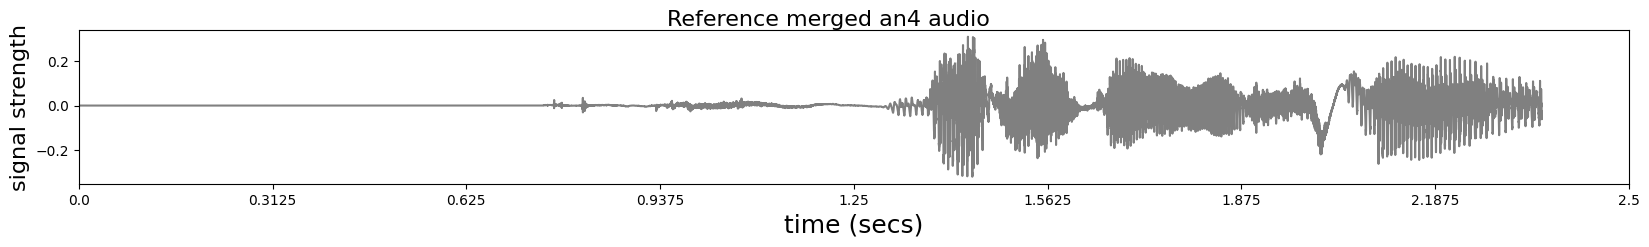

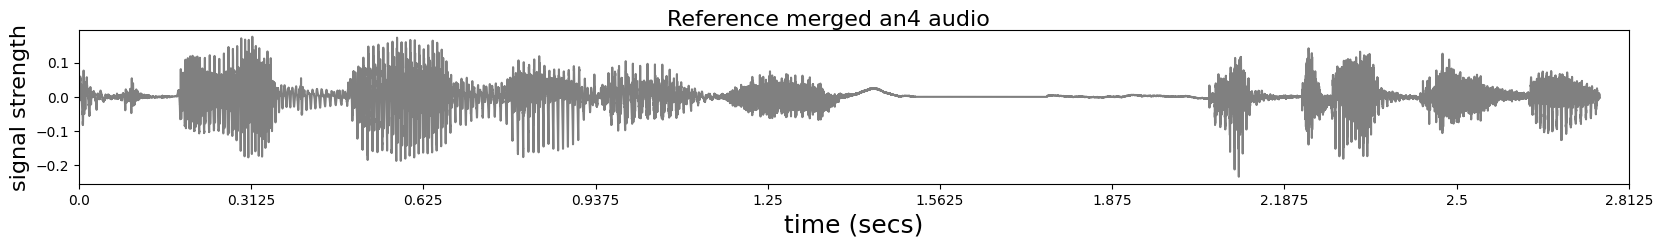

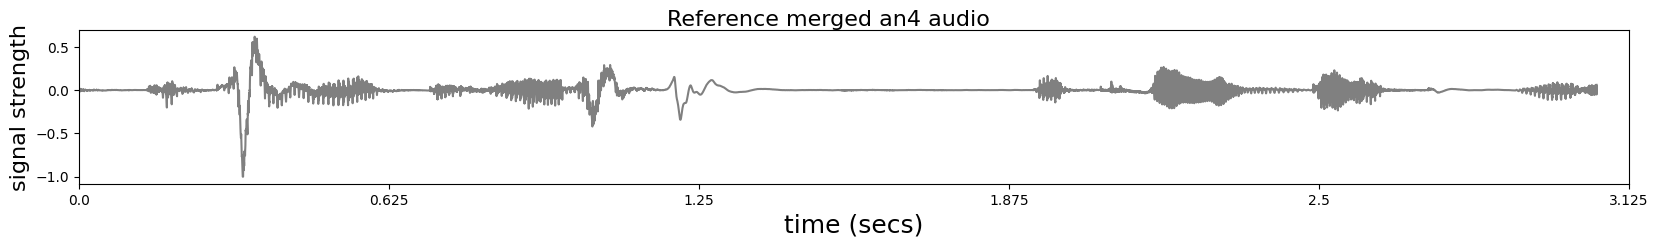

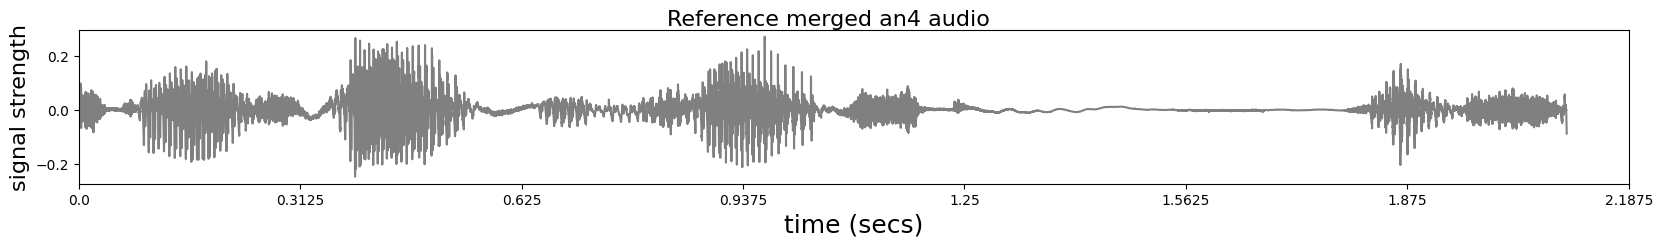

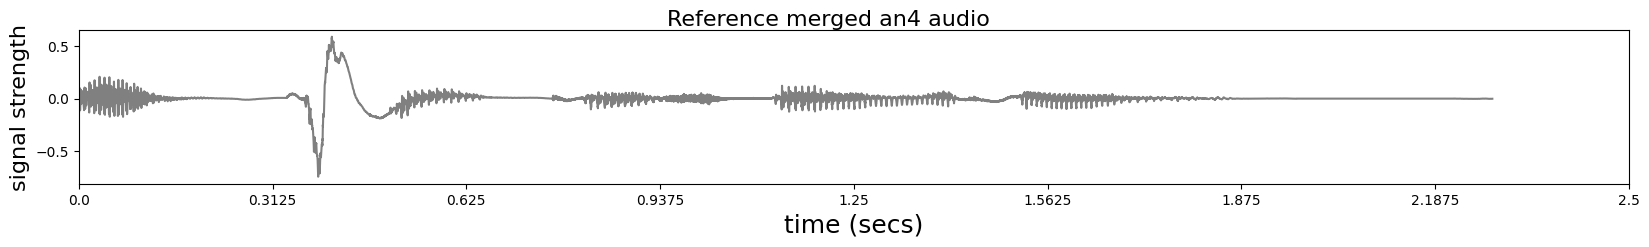

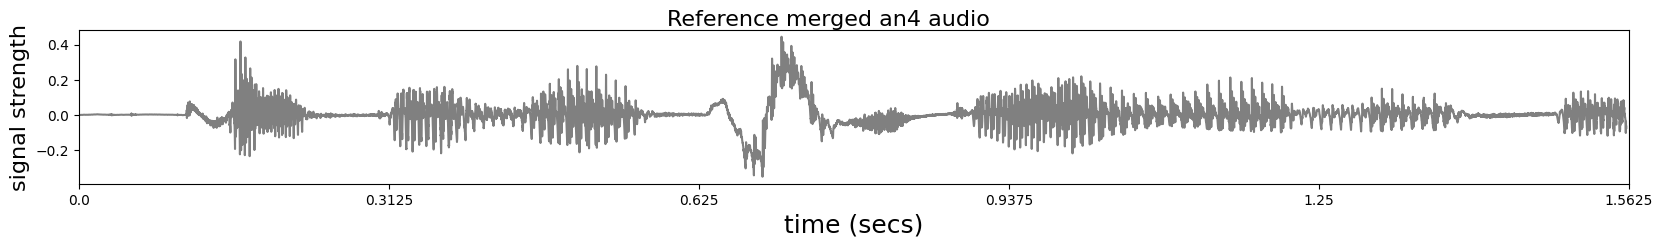

In [192]:
for i in range(1,c):
  play_audio(f"C:/Users/GIRIRAJ ROY/Desktop/Dummy/Audio/{i}.wav")